Task 2.1: Summary Statistics & Missing-Value Report

import pandas as pd
import numpy as np
df = pd.read_csv('../../data/raw/benin-malanville.csv')
# Task 2.1.1: Summary statistics
summary_stats = df.describe(percentiles=[.25, .5, .75])

# Task 2.1.2: Missing values
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
})

# Display results
print("Summary Statistics:")
display(summary_stats)
print("\nMissing Values Report:")
display(missing_report[missing_report['Missing Count'] > 0])

Task 2.2: Outlier Detection & Cleaning

In [25]:
from scipy import stats

# Columns to check for outliers
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores and flag outliers
for col in cols:
    df[f'{col}_z'] = stats.zscore(df[col])
    df[f'{col}_outlier'] = np.abs(df[f'{col}_z']) > 3

# Count outliers
outlier_report = df[[f'{col}_outlier' for col in cols]].sum()

# Handle missing values (>5%: impute, else drop)
high_missing = missing_report[missing_report['Missing %'] > 5].index
for col in high_missing:
    df[col] = df[col].fillna(df[col].median())  # Impute with median

df.dropna(subset=cols, inplace=True)  # Drop rows with missing data in key columns

# Save cleaned data
df.to_csv('../../data/clean/benin_clean.csv', index=False)

c:\Users\Misgan\solar-challenge-week1\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Task 2.3: Time Series Analysis

In [26]:
import matplotlib.pyplot as plt

# Convert timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, Tamb over time
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
metrics = ['GHI', 'DNI', 'DHI', 'Tamb']
for i, metric in enumerate(metrics):
    df[metric].resample('D').mean().plot(ax=axes[i], title=f'Daily {metric} Trend')
plt.tight_layout()
plt.show()

KeyError: 'Timestamp'

Task 2.4: Cleaning Impact Analysis

<Figure size 800x400 with 0 Axes>

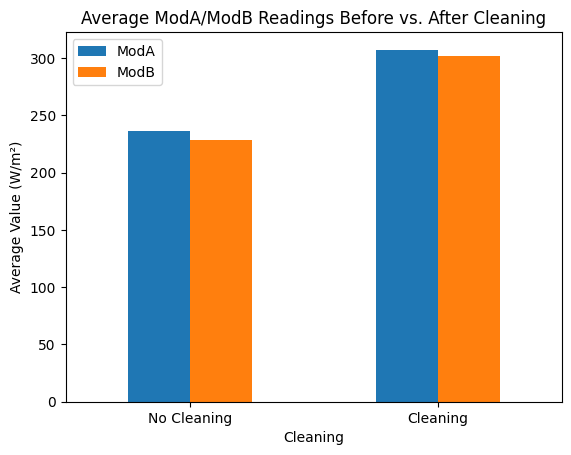

In [ ]:
# Group by Cleaning flag
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Plot comparison
plt.figure(figsize=(8, 4))
cleaning_impact.set_index('Cleaning').plot(kind='bar', rot=0)
plt.title('Average ModA/ModB Readings Before vs. After Cleaning')
plt.xticks([0, 1], ['No Cleaning', 'Cleaning'])
plt.ylabel('Average Value (W/m²)')
plt.show()

Task 2.5: Correlation & Relationships

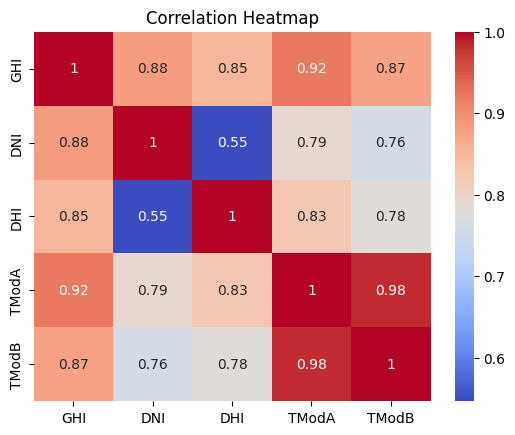

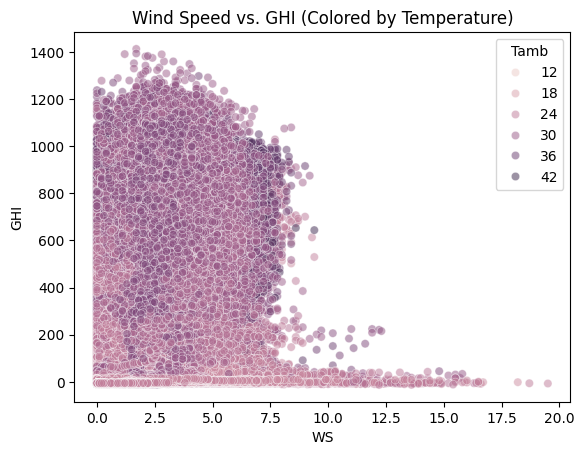

In [ ]:
import seaborn as sns

# Heatmap
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter Plots
sns.scatterplot(data=df, x='WS', y='GHI', hue='Tamb', alpha=0.5)
plt.title('Wind Speed vs. GHI (Colored by Temperature)')
plt.show()

Task 2.6: Wind & Distribution Analysis

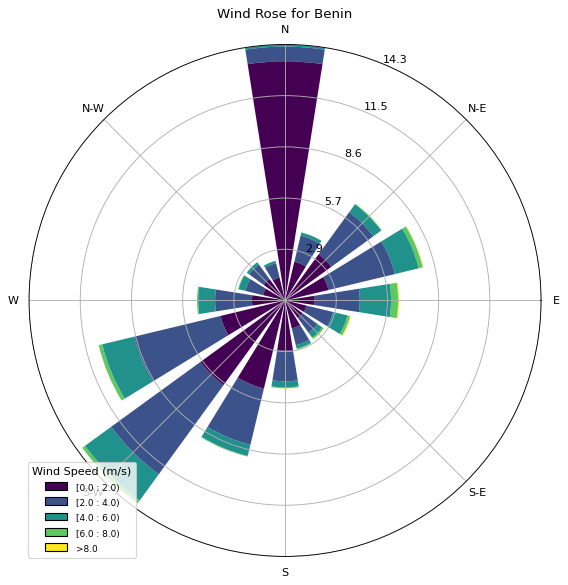

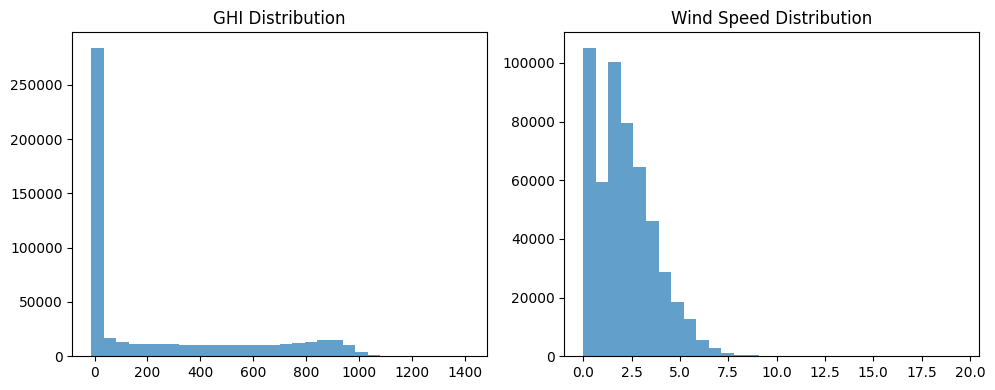

In [ ]:
# Wind Rose (Install windrose: pip install windrose)
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, bins=np.arange(0, 10, 2))
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose for Benin')
plt.show()

# Histograms
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, alpha=0.7)
plt.title('GHI Distribution')

plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, alpha=0.7)
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

Task 2.7: Temperature Analysis

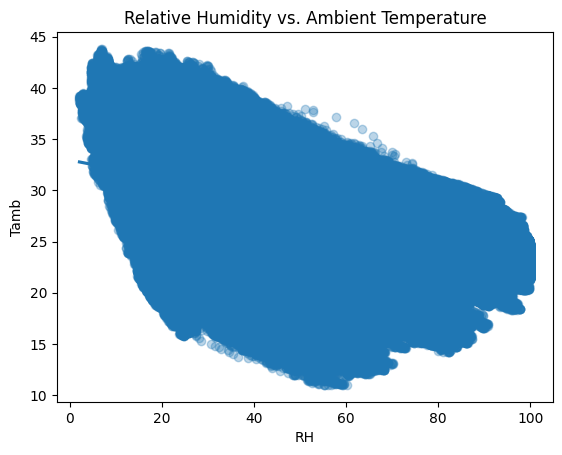

In [ ]:
# RH vs. Tamb
sns.regplot(data=df, x='RH', y='Tamb', scatter_kws={'alpha': 0.3})
plt.title('Relative Humidity vs. Ambient Temperature')
plt.show()

Task 2.8: Bubble Chart

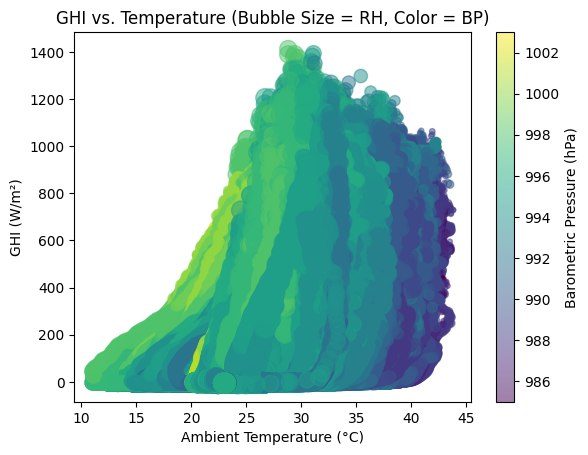

In [ ]:
plt.scatter(
    x=df['Tamb'], 
    y=df['GHI'], 
    s=df['RH']*2,  # Bubble size = RH
    c=df['BP'],     # Color = BP
    alpha=0.5,
    cmap='viridis'
)
plt.colorbar(label='Barometric Pressure (hPa)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs. Temperature (Bubble Size = RH, Color = BP)')
plt.show()